In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from pyecharts import options as opts
from pyecharts.charts import Bar
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import pickle
import pymysql
import warnings
warnings.filterwarnings('ignore') 

# Figure 1

In [3]:
# Load data
data_part_I = pd.read_stata('data_part_I.dta') 
data_part_I.tail(2) 

Author_id  Award   Group                     Type    Work_id  \
5712356  Au_23562  aw_33  g_4470  Matched Non-Prizewinner  w_5712357   
5712357  Au_23562  aw_33  g_4470  Matched Non-Prizewinner  w_5712358   

         Relative_Publication_year  Post  Team_size  Novelty  Convergence  \
5712356                         -4     0          5      0.0          0.0   
5712357                         12     1         20      1.0          1.0   

         Interdisciplinarity  
5712356             0.205097  
5712357             0.185500

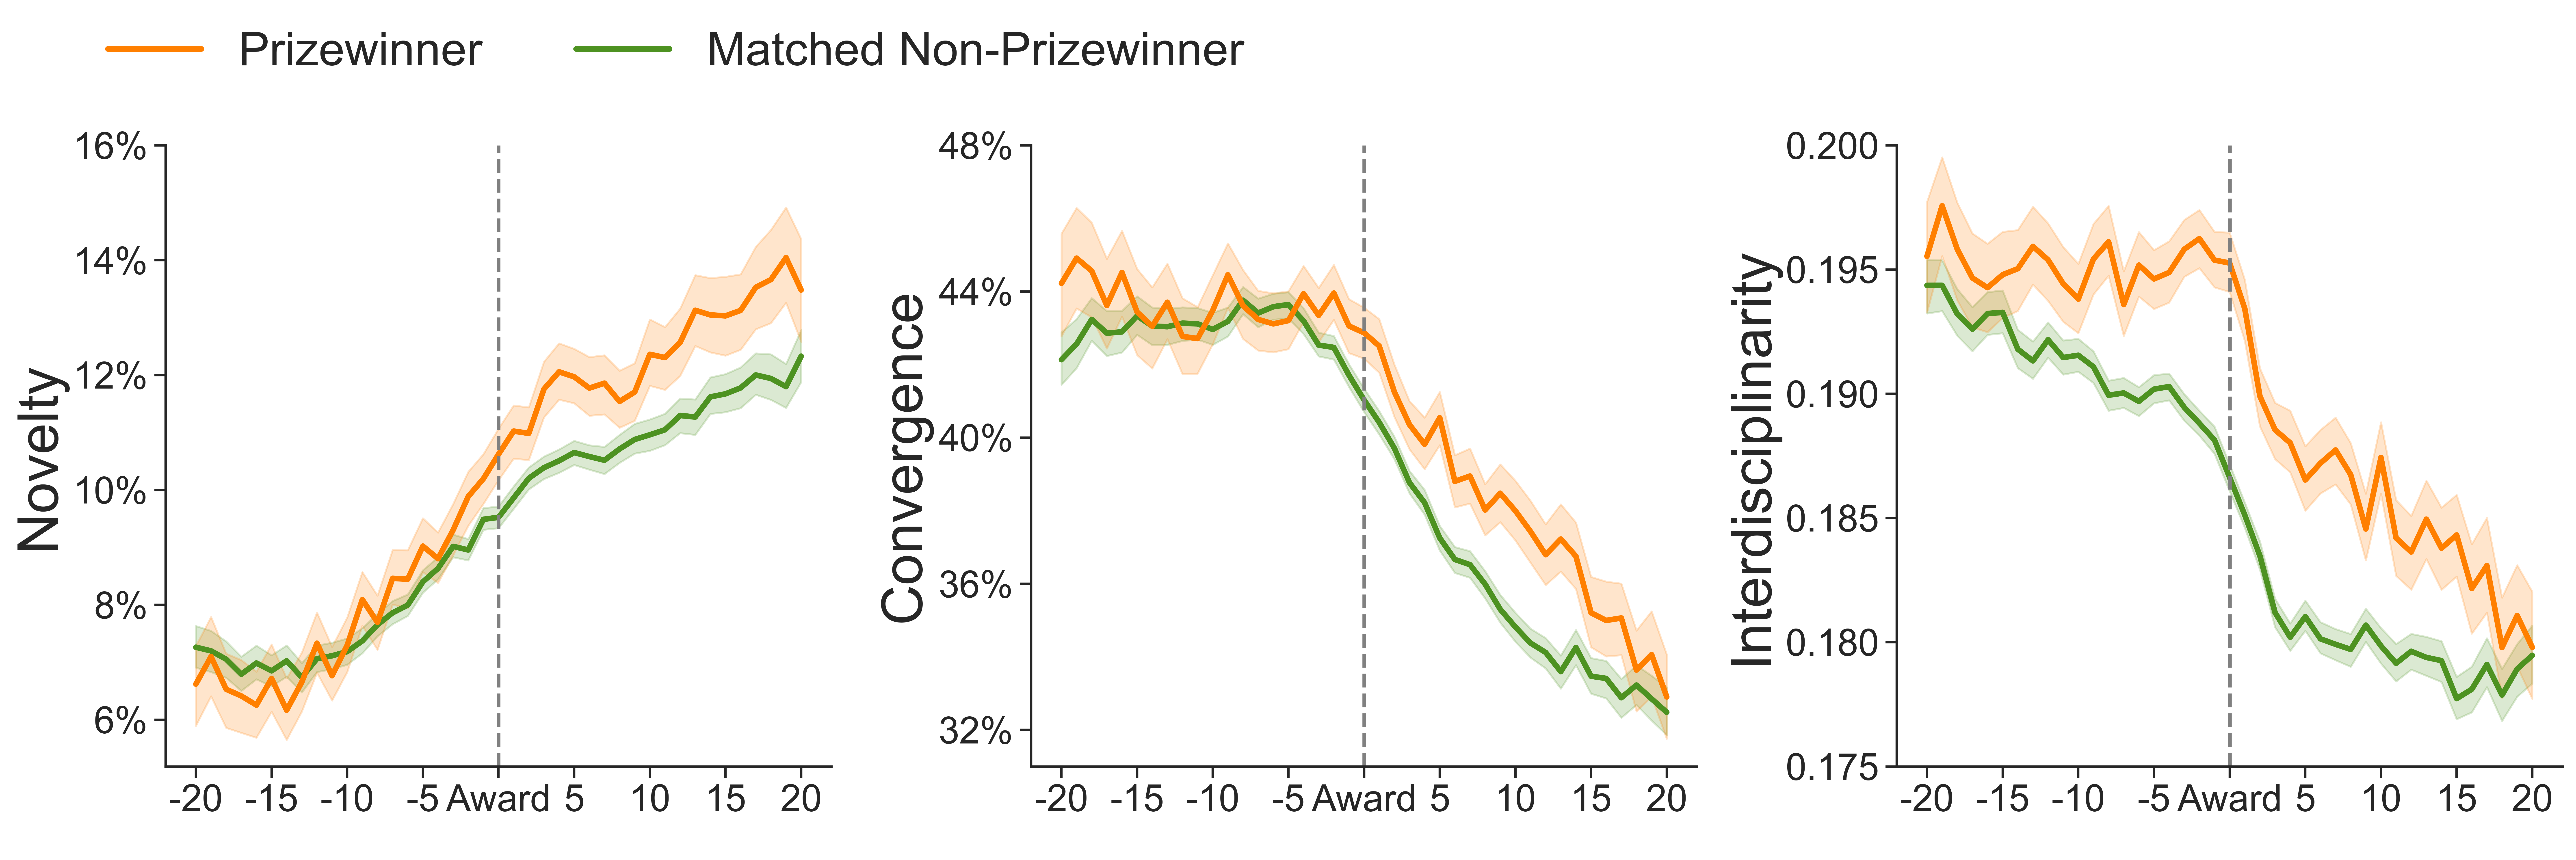

In [6]:
# Figure 1
Data = data_part_I[abs(data_part_I.Relative_Publication_year)<=20] 
novelty = Data.dropna(subset=["Novelty"])
convergence = Data.dropna(subset=["Convergence"])
interdisciplinarity = Data.dropna(subset=["Interdisciplinarity"]) 

# color setting
color_dict_four = dict({"Prizewinner":'#ff7f00',  
                         "Matched Non-Prizewinner":'#4d9221',})

def main_figure(df,y,ylabel):
    ax = sns.lineplot(x="Relative_Publication_year", y=y, data = df,
                 hue="Type",palette=color_dict_four,size='Type',
                 hue_order=['Matched Non-Prizewinner', 'Prizewinner'],
                 sizes=[3, 3])  
                   
    ax.get_legend().remove()  
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt. axvline(x=0,color="grey",ls="--", lw=2)
    plt.ylabel(ylabel,fontsize=30) 
    plt.yticks(fontsize=20) 
    plt.xticks([-20,-15,-10,-5,0,5,10,15,20], 
               ["-20","-15","-10","-5","Award","5","10","15","20"],fontsize=20)
    plt.xlabel(" ")  

def to_percent(temp, position):
    return '%.0f'%(100*temp) + '%'

fig = plt.figure(dpi=600,figsize=(23,6))
plt.subplots_adjust(wspace =0.3, hspace =0) 
sns.set(style="ticks")
ax1 = fig.add_subplot(1,3,1)
ax1 = main_figure(novelty,"Novelty","Novelty") 
plt.yticks([0.06,0.08,0.10,0.12,0.14,0.16], fontsize=20) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
handles, labels = plt.gca().get_legend_handles_labels()
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],
           fontsize=25,frameon=False,ncol=2, loc="upper left",bbox_to_anchor=(-0.15, 1.25))

ax2 = fig.add_subplot(1,3,2) 
ax2 = main_figure(convergence,"Convergence","Convergence")  
plt.ylim(0.31, 0.48)
plt.yticks([0.32, 0.36, 0.40, 0.44, 0.48], fontsize=20) 
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
    
ax3 = fig.add_subplot(1,3,3)  
ax3 = main_figure(interdisciplinarity,"Interdisciplinarity","Interdisciplinarity") 
plt.ylim(0.175, 0.2)
plt.yticks([0.175,0.180,0.185,0.190,0.195,0.200], fontsize=20)  
plt.show() 

# Figure 2

In [24]:
# Load data
# The data is exported from the regression model in file "Reg_Part_I.do"  
Margin_data_Figure2 = pd.read_excel("Margin_data_Figure2.xlsx") 
Margin_data_Figure2.tail(2)

Relative_Publication_year  If_prizewinner   Novelty  Novelty_se  \
16                          3               1  0.138091    0.002805   
17                          4               1  0.160684    0.003105   

    Convergence  Convergence_se  Interdisciplinarity  Interdisciplinarity_se  
16     0.352162        0.004036             0.182927                0.001124  
17     0.284423        0.004679             0.174201                0.001321

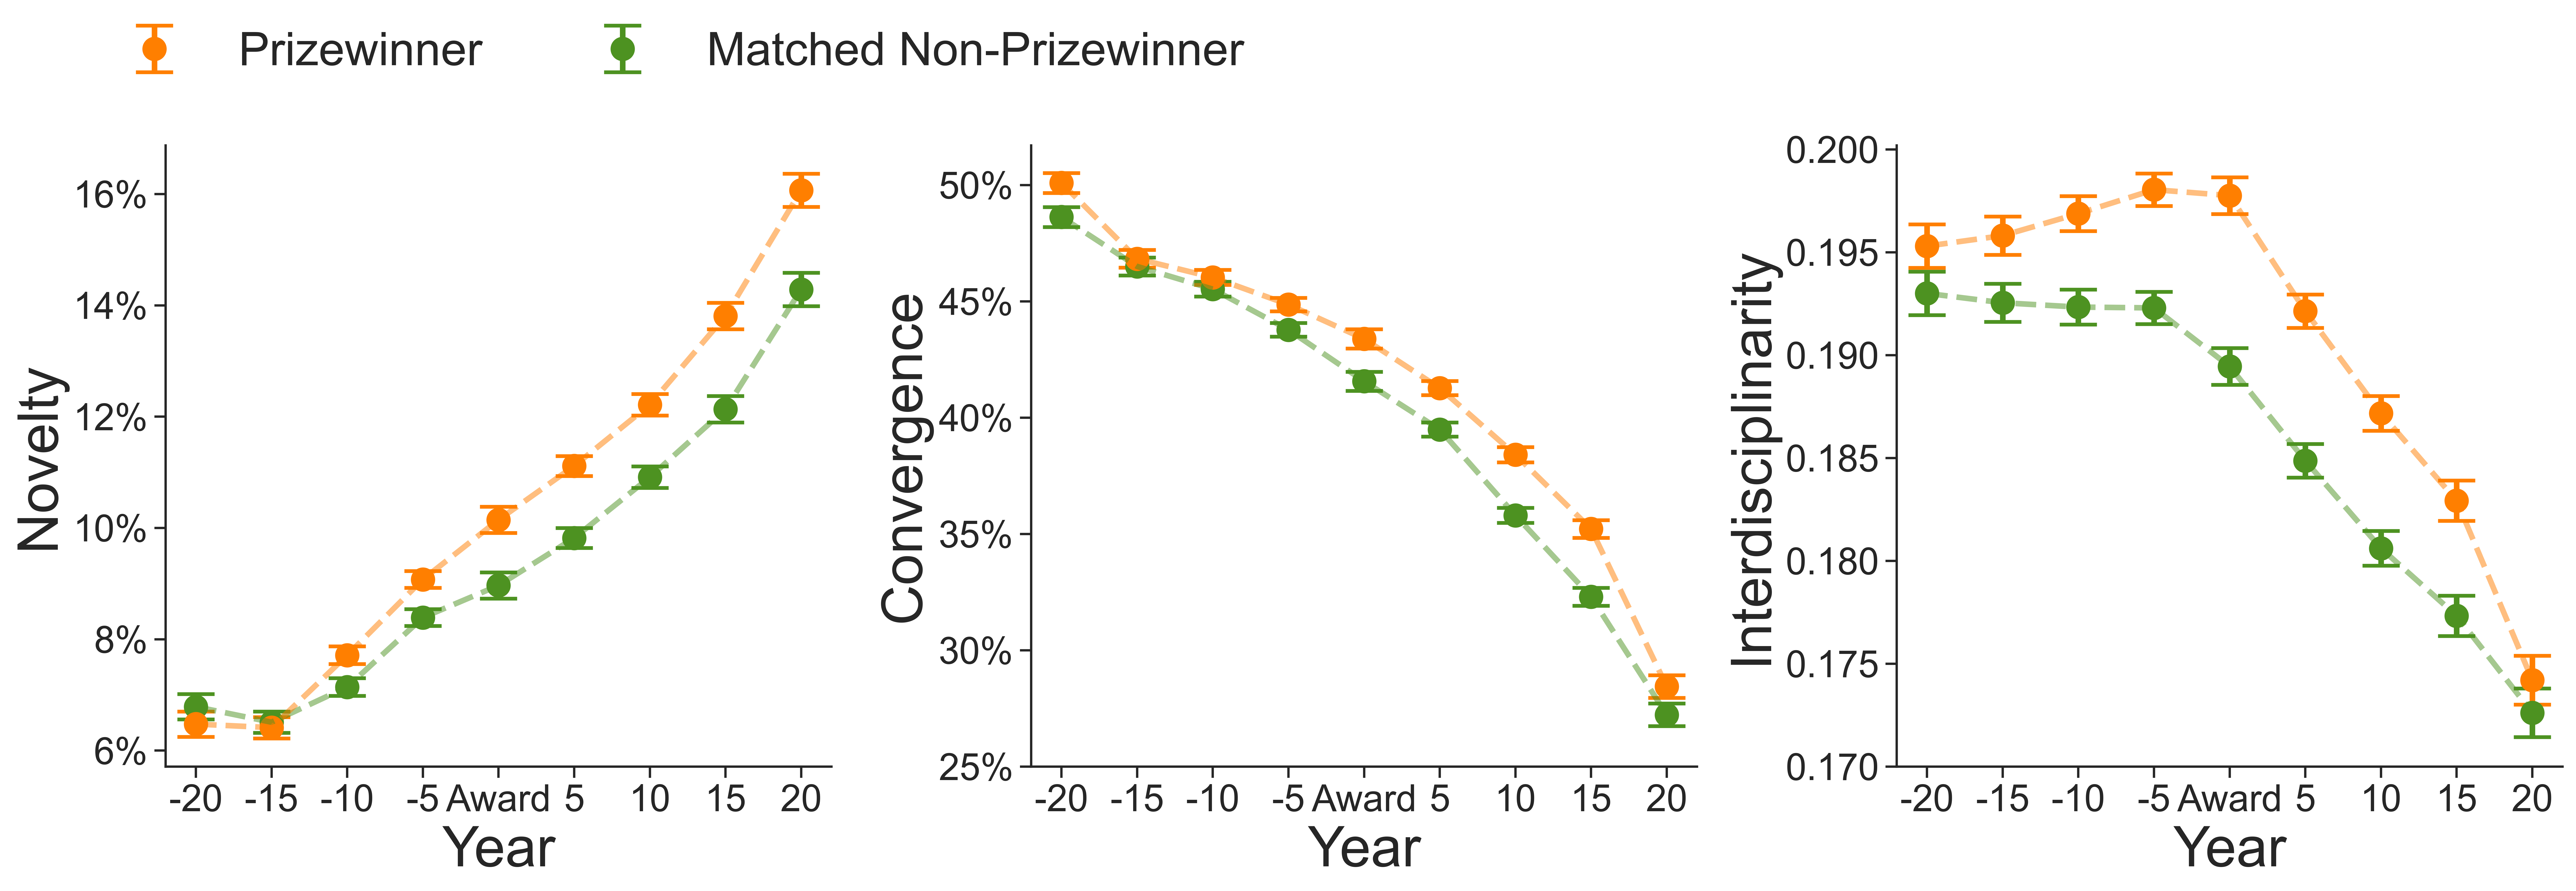

In [21]:
# Figure 2
def Margin_plot(df,y, ySe, ylabel):
    winner_NPY = df[df["If_prizewinner"]==1]  
    match_NPY = df[df["If_prizewinner"]==0]
    
    plt.plot(match_NPY["Relative_Publication_year"], match_NPY[y], lw=3, ls="--", color='#4d9221', alpha=0.5)
    plt.errorbar(match_NPY["Relative_Publication_year"], match_NPY[y] , yerr=1.96*match_NPY[ySe] ,
                            fmt ='o',  ms = 12, mfc="#4d9221", mec="#4d9221", 
                            ecolor="#4d9221", elinewidth=3, capsize=10,capthick=2, 
                            label='Matched Non-Prizewinner',zorder=0)  
    
    plt.plot(winner_NPY["Relative_Publication_year"], winner_NPY[y], lw=3, ls="--", color='#ff7f00', alpha=0.5)
    plt.errorbar(winner_NPY["Relative_Publication_year"], winner_NPY[y] , yerr=1.96*match_NPY[ySe] ,
                            fmt ='o', ms = 12, mfc="#ff7f00", mec="#ff7f00", 
                            ecolor="#ff7f00", elinewidth=3, capsize=10, capthick=2, 
                            label='Prizewinner',zorder=0)  
    
    plt.ylabel(ylabel,fontsize=30) 
    plt.xlabel("Year",fontsize=30)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False) 
    plt.xticks([-4,-3,-2,-1,0,1,2,3,4], 
               ["-20","-15","-10","-5","Award","5","10","15","20"],fontsize=20)

fig = plt.figure(dpi=600,figsize=(23,6))
sns.set(style="ticks")
fig.tight_layout() 
plt.subplots_adjust(wspace =0.3, hspace =0) 

ax1 = fig.add_subplot(1,3,1)
ax1 = Margin_plot(Margin_data_Figure2, "Novelty", "Novelty_se", "Novelty")
plt.yticks([0.06, 0.08, 0.10, 0.12, 0.14, 0.16],fontsize=20)
def to_percent(temp, position):
        return '%.0f'%(100*temp) + '%'
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
handles, labels = plt.gca().get_legend_handles_labels() 
order = [1, 0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],fontsize=25,
           frameon=False, loc='upper left',ncol=2, bbox_to_anchor=(-0.15, 1.25))

ax2 = fig.add_subplot(1,3,2)
ax2 = Margin_plot(Margin_data_Figure2, "Convergence", "Convergence_se", "Convergence")
plt.yticks([0.25,0.30, 0.35, 0.40, 0.45, 0.5],fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

ax3 = fig.add_subplot(1,3,3)
ax3 = Margin_plot(Margin_data_Figure2, "Interdisciplinarity", "Interdisciplinarity_se", "Interdisciplinarity")
plt.yticks([0.170,0.175,0.180,0.185, 0.190, 0.195, 0.2],fontsize=20)
plt.show() 

# Figure 4

In [16]:
# Load data
# The data is exported from the regression model in file "Reg_Part_II.do"  
tie_duration = pd.DataFrame({'If_prizewinner':[0, 1],
                            'Mean':[5.10831, 4.858049],
                            'Se':[0.0126454,0.0283663]})

tie_overlap = pd.DataFrame({'If_prizewinner':[0, 1],
                            'Mean':[0.0867421,  0.0802546],
                            'Se':[0.0003269, 0.0006862]})

topic_similarity = pd.DataFrame({'If_prizewinner':[0, 1],
                            'Mean':[0.0347118, 0.0314668],
                            'Se':[0.0000859,  0.0001772]}) 

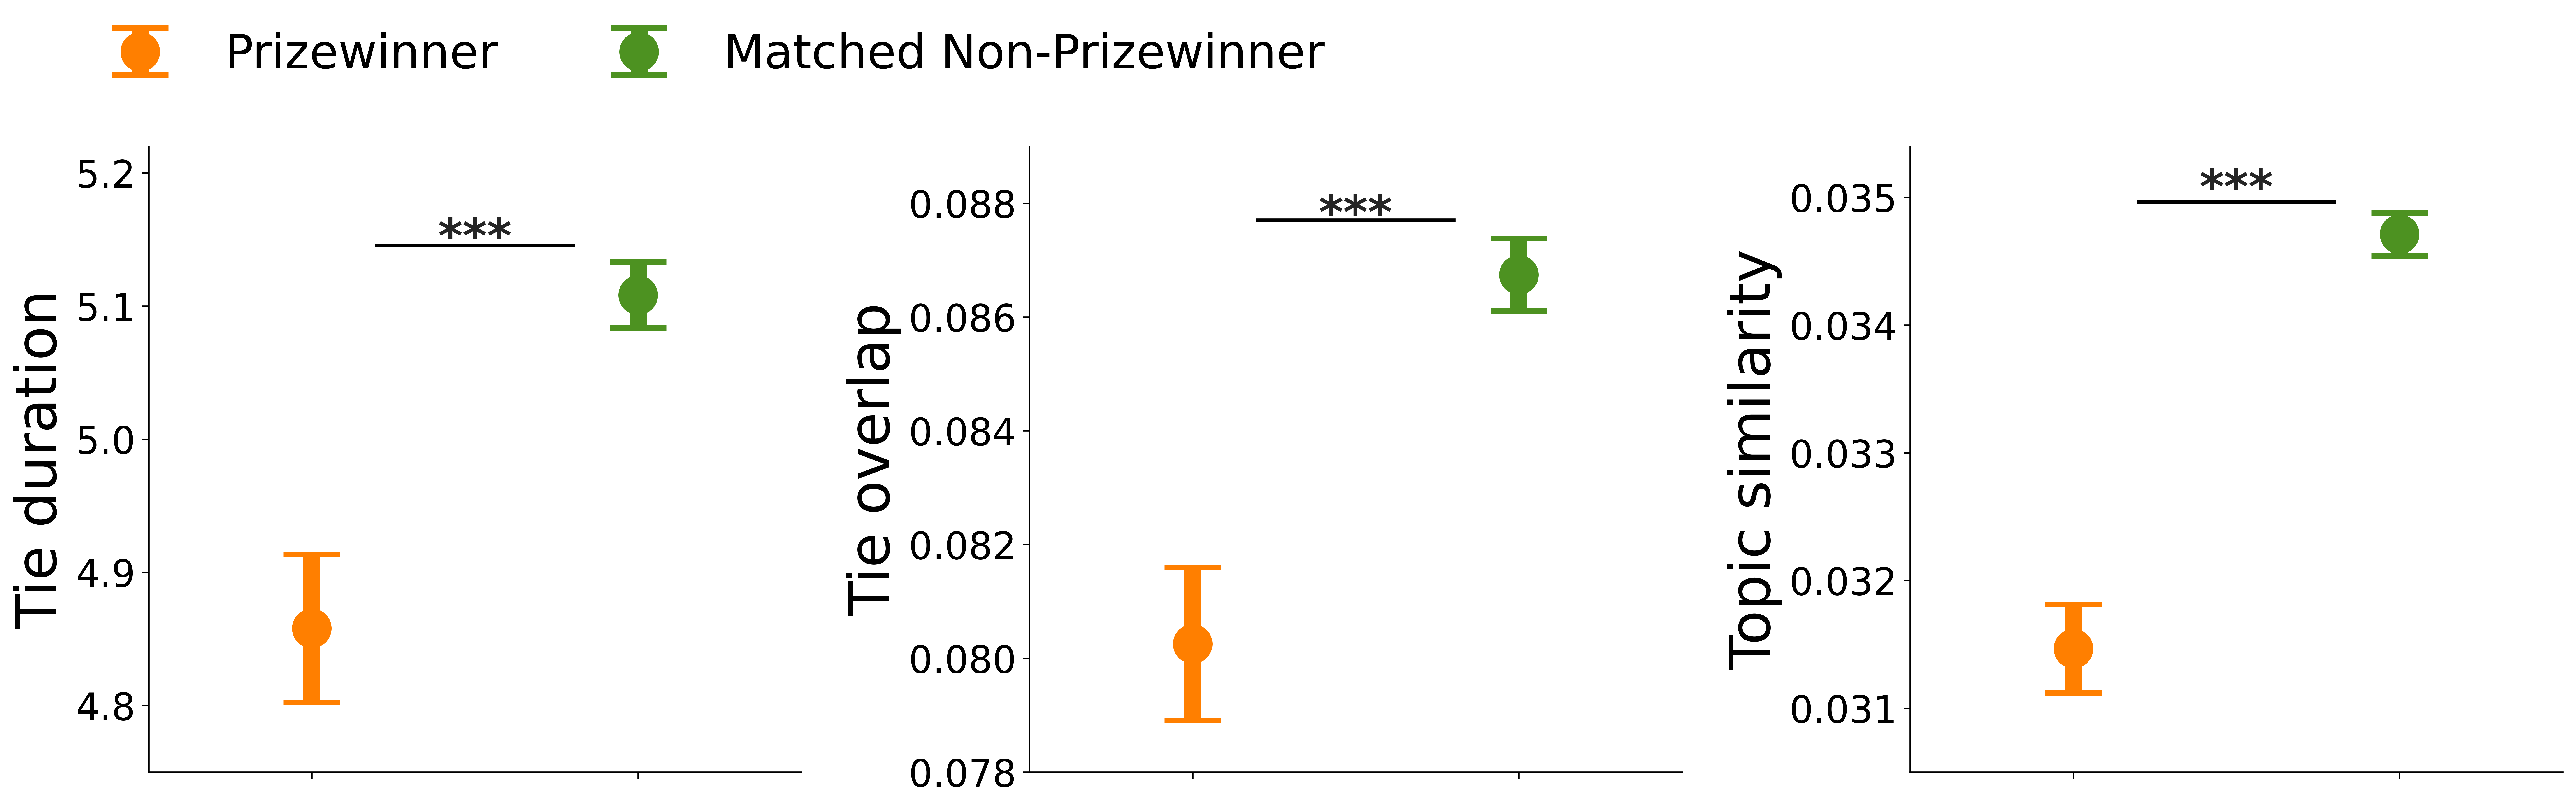

In [19]:
# Figure 4
def Tie_margin_plot(df, ylabel):
    PWs = df[df.If_prizewinner == 1]
    NPWs = df[df.If_prizewinner == 0]

    pos = [0.25, 0.35]
    plt.errorbar(pos[0], PWs['Mean'], yerr=1.96*PWs['Se'],
                 label="Prizewinner", fmt='o', ms=20, color="#ff7f00",
                 elinewidth=9, capsize=15, capthick=3)

    plt.errorbar(pos[1], NPWs['Mean'], yerr=1.96*NPWs['Se'],
                 label="Matched Non-Prizewinner", fmt='o', ms=20, color="#4d9221",
                 elinewidth=9, capsize=15, capthick=3)

    plt.xlim(0.2, 0.4)
    plt.xticks([0.25, 0.35], [ ], fontsize=18)
    plt.ylabel(ylabel, fontsize=30)
    
#     set siginificant stars
    y_text_line = NPWs['Mean'] + 1.5*1.96*NPWs['Se']
    y_text_star = NPWs['Mean']+1.96*NPWs['Se']
    plt.plot([pos[0]+0.02, pos[1]-0.02], [y_text_line, y_text_line], linestyle='-', color='black', linewidth=2)
    plt.annotate('***', ((pos[0] + pos[1]) / 2, y_text_star), xytext=(0, 0), color="#252525",
                 fontsize=25, textcoords='offset points', ha='center', va='bottom', weight='bold')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig = plt.figure(dpi=600,figsize=(23,6))
plt.subplots_adjust(wspace=0.35)
ax1 = fig.add_subplot(1,3,1)
ax1 = Tie_margin_plot(tie_duration,'Tie duration')
plt.ylim(4.75, 5.22)
plt.yticks([4.8, 4.9, 5.0, 5.1, 5.2], [4.8, 4.9, 5.0, 5.1, 5.2], fontsize=20)
plt.legend(fontsize=25,frameon=False,ncol=2, loc="upper left",bbox_to_anchor=(-0.15, 1.25))

ax2 = fig.add_subplot(1,3,2)
ax2 = Tie_margin_plot(tie_overlap,'Tie overlap')
plt.ylim(0.078,0.089 )
plt.yticks([0.078, 0.08, 0.082, 0.084, 0.086, 0.088 ], [0.078, '0.080', 0.082, 0.084, 0.086, 0.088], fontsize=20)

ax3 = fig.add_subplot(1,3,3)
ax3 = Tie_margin_plot(topic_similarity,'Topic similarity')
plt.ylim(0.0305, 0.0354)
plt.yticks([0.031, 0.032, 0.033, 0.034, 0.035], [0.031, 0.032, 0.033, 0.034, 0.035], fontsize=20)
plt.show() 